# Лабораторная работа №2. Дискретные LTI системы.

Курс: Лаборатория цифровой обработки сигналов (ФРКТ, ФАКТ), осенний семестр.

LMS: https://lms.mipt.ru/course/view.php?id=4561&type=lab

* В имени этого файла заменить familyname на Ваши фамилию и имя, либо только фамилию.  
* Задачи 2.1, 3.1(А), 3.2 содержат практическую часть, выполняемую с использованием осциллографа. 
* Задача 4.1 предполагает работу с системой Engee либо РДС. Информацию о них можно найти на следующих страницах. 
* * Engee https://engee.com (для регистрации использовать почтовый аккаунт @phystech.edu).
* * РДС https://www.ipu.ru/science/applied-research/software/calculation-of-dynamic-systems . 
* В некоторых задачах варианты определяются первой буквой Вашей фамилии.

In [1]:
# Импорт библиотек и функций
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile
from scipy import signal
import time

def osc_read_txt(file, const_level=0):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    dt, unit = str1[1].replace(',', '.').split(' ')[3:5]
    dt = float(dt)
    if unit=='uS':
        dt*=1e-6
    elif unit=='nS':
        dt*=1e-9
    elif unit=='mS':
        dt*=1e-3    
    fs = int(1.0 / dt) 
    dv, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(dv)
    if unit=='mV':
        dv*=1e-3 
        
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level    
    return fs, signal_lev

In [2]:
# Для использования backend matplotlib inline/widget/notebook, раскомментируйте соответствующую строку ниже.
# Установка widget: pip install --upgrade jupyterlab ipympl
# %matplotlib inline
%matplotlib notebook
#%matplotlib widget

Модуль 1. Линейная дискретная свертка.

* Задача 1.1. Линейная дискретная свертка прямоугольных окон.

* Задача 1.2. Эффективное вычисление свертки.

Модуль 2. Характеристики LTI систем.

* Задача 2.1. Фильтр скользящего среднего.

* Задача 2.2. Двухкаскадный фильтр.

Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса.

* Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ.

* Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ.   

Модуль 4. Графическое моделирование динамических систем.

* Задача 4.1. Моделирование цифрового фильтра в Engee/РДС.

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон.

| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

In [3]:
M = 4

x = np.ones(M)
h = np.ones(M)

y = np.array([])
for k in range (0, 2*M-1):
    summ = 0
    for m in range (0, M):
        if ((k-m >= 0) and (k-m < M)):
            summ += x[m]*h[k-m]
    y = np.append(y,[summ])
    
    
print("y = ", y)

y = signal.convolve(x, h)

print("y = ", y)

y =  [1. 2. 3. 4. 3. 2. 1.]
y =  [1. 2. 3. 4. 3. 2. 1.]


## Задача 1.2. Эффективное вычисление свертки.


| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|     $m$    |   17   |   18   |   17   |   18   |   17   |   18   |   17   |   18   |   17   |   18   |
| $n_0$ |  128  |  32  |  256  |  64  |  512  |  1024  |  230  |  325  |  501  |  1000  |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N=2^m$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



In [9]:
import math
from tqdm import tqdm
import time
m = 17
N = 2**m

n_0 = 128

x = np.arange(N)
h = np.arange(N)

x = np.cos(2*math.pi*n_0*x/N)
h = np.sin(2*math.pi*n_0*h/N)

s = time.time()
y = signal.convolve(x, h, method="direct")
f = time.time()
rst = f-s
rst

12.223270416259766

In [10]:
s = time.time()
y_cons = signal.convolve(x, h, method="fft")
f = time.time()
rst = f-s
dlt = np.max(np.abs(y - y_cons))
print(rst)
print(dlt)

0.015999317169189453
3.637978807091713e-11


Выводы, прямой подход вычислился за 12.22 секунды, а быстрый за 0.015 секунды

In [11]:
print("Быстрее в ", 12.223270416259766/0.015999317169189453, "раз")

Быстрее в  763.9870056328793 раз


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего.

| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

**Практическая часть (сглаживание сигнала датчика).**

Примените фильтр скользящего среднего для сглаживания шумов в записях сигналов с двух различных аналоговых датчиков. При этом один из сигналов может быть взят из первой лабораторной работы (задача 1.1). Коэффициент $M$ подобрать самостоятельно. 
* Сделайте предположения о причинах возникновения шума в измерениях. 
* Обоснуйте выбор коэффициента $M$ для каждого из двух случаев.



<IPython.core.display.Javascript object>


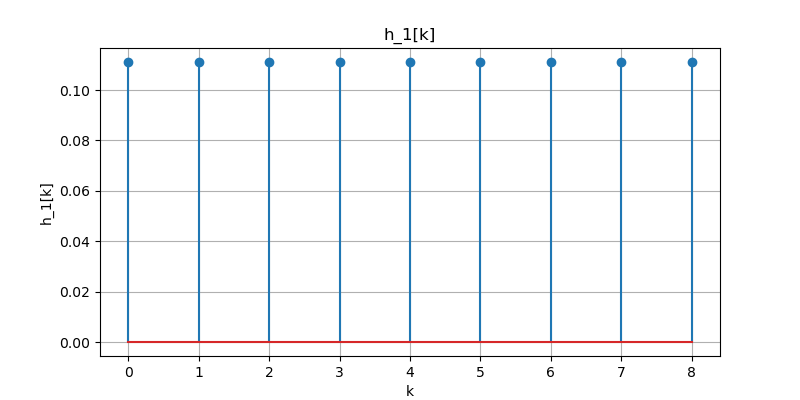

<IPython.core.display.Javascript object>


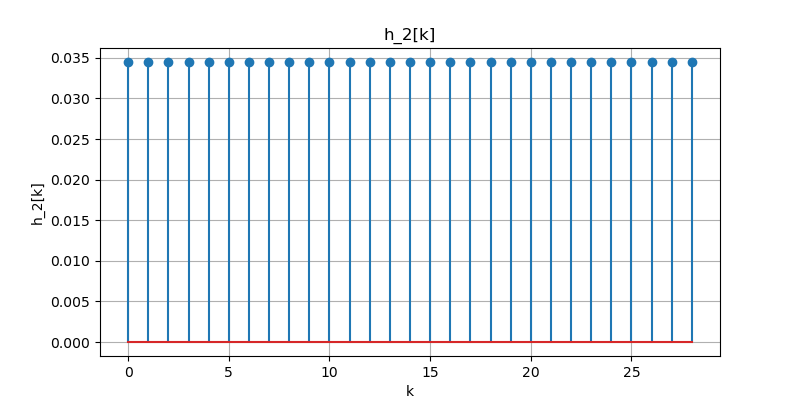

<IPython.core.display.Javascript object>


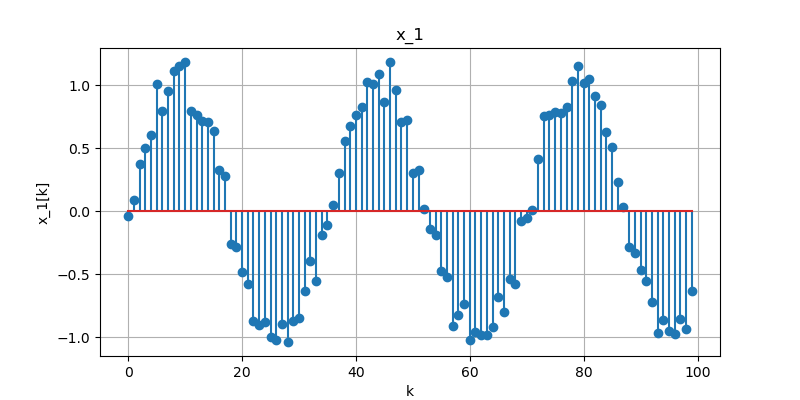

<IPython.core.display.Javascript object>


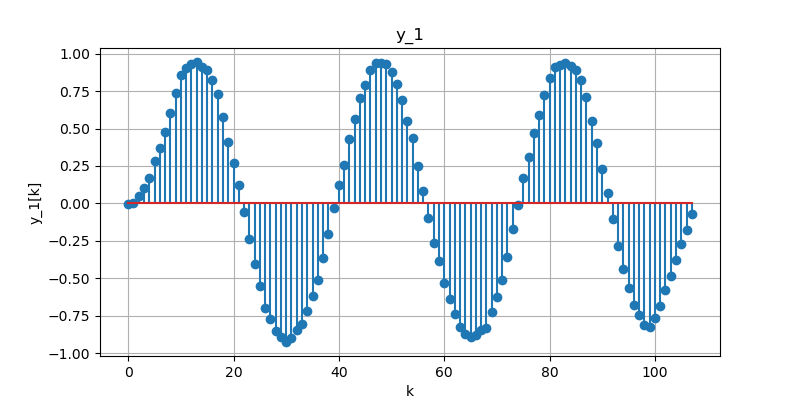

<IPython.core.display.Javascript object>


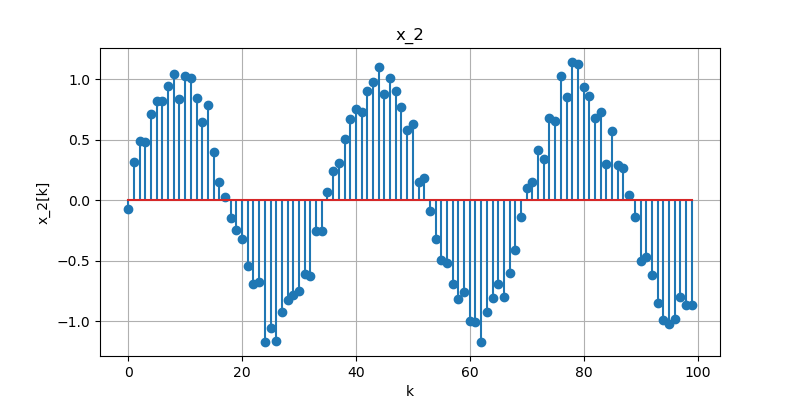

<IPython.core.display.Javascript object>


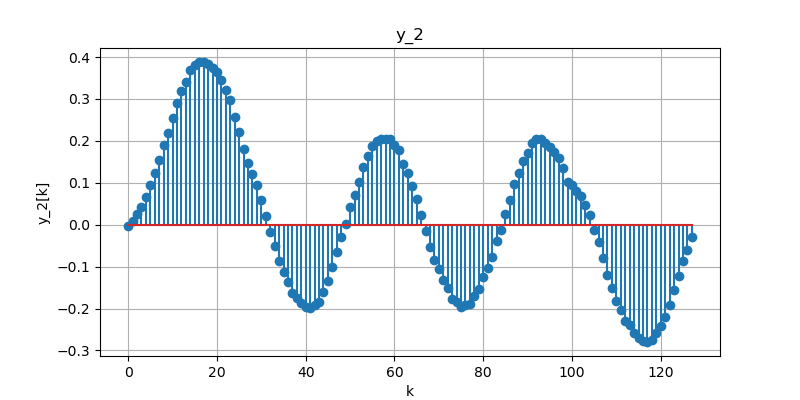

[]

In [15]:
M_1 = 9
M_2 = 29
K = 35
N = 100

h_1 = np.ones(M_1) / M_1
h_2 = np.ones(M_2) / M_2

plt.figure(figsize=[8, 4])
plt.title("h_1[k]")
plt.stem(np.arange(h_1.size), h_1)
plt.grid()
plt.xlabel("k")
plt.ylabel("h_1[k]")
plt.plot()

plt.figure(figsize=[8, 4])
plt.title("h_2[k]")
plt.stem(np.arange(h_2.size), h_2)
plt.grid()
plt.xlabel("k")
plt.ylabel("h_2[k]")
plt.plot()

k = np.arange(N)

x_1 = np.sin(2*np.pi*k/K) + np.random.normal(0, 0.1, N)
y_1 = signal.convolve(x_1, h_1)

x_2 = np.sin(2*np.pi*k/K) + np.random.normal(0, 0.1, N)
y_2 = signal.convolve(x_2, h_2)

plt.figure(figsize=[8, 4])
plt.title("x_1")
plt.stem(k, x_1)
plt.grid()
plt.ylabel("x_1[k]")
plt.xlabel("k")
plt.plot()

plt.figure(figsize=[8, 4])
plt.title("y_1")
plt.stem(np.arange(y_1.size), y_1)
plt.grid()
plt.ylabel("y_1[k]")
plt.xlabel("k")
plt.plot()

plt.figure(figsize=[8, 4])
plt.title("x_2")
plt.stem(k, x_2)
plt.grid()
plt.ylabel("x_2[k]")
plt.xlabel("k")
plt.plot()

plt.figure(figsize=[8, 4])
plt.title("y_2")
plt.stem(np.arange(y_2.size), y_2)
plt.grid()
plt.ylabel("y_2[k]")
plt.xlabel("k")
plt.plot()

## Задача 2.2. Двухкаскадный фильтр

| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:---------:|----:|----:|----:|-----:|----:|----:|----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

С помощью функции `signal.convolve` определите (для произвольного выбранного Вами коэффициента $M$), изменится ли импульсная характеристика от перестановки порядка каскадов. 

**Практическая часть (реверберация).**

Подайте на вход такого  фильтра аудиофайл (к примеру, запись речи длиной в несколько секунд). Коэффициент $M$ подберите самостоятельно. Определите, меняется ли выход системы от перестановки порядка каскадов.

# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ.

| Первая буква: | А,Б | В,Г | Д,Е,Ё | Ж,З,И,Й,К | Л,М | Н,О | П,Р | С,Т,У,Ф | Х,Ц,Ч,Ш,Щ,Ы | Э,Ю,Я |
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

**Практическая часть.**
Практическая часть выполняется в одном из двух вариантов по выбору студента. 

**Вариант А (резисторный сумматор)**. Используя схему сумматора на резисторах получите сумму двух синусоидальных сигналов, частота одного из которых попадает в полову пропускания фильтра, а второго - в полосу задержки. Подайте данный сигнал на вход данного фильтра. Сравните спектр сигнала до и после фильтрации.

**Вариант Б (минусовая фонограмма)**. Запишите аудиофайл, содержащий высокие и низкие частоты. Пропустите сигнал через фильтр. Сравните запись звука и спектр сигнала до и после фильтрации.


## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ.   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(familyname)` (приведенной ниже), где `familyname` – фамилия. 

**Практическая часть (АМ-сигнал).**

С помощью амплитудной модуляции получите сигнал с тремя гармоническими компонентами, лежащими в полосах частот с разными коэффициентами пропускания.  Пропустите сигнал через данный фильтр. Сравните сигнал и его спектр до и после фильтрации. 

Варинат 5

In [9]:

import numpy as np
import matplotlib.pyplot as plt 
def task_3_2(familyname):
    variant = int(hash(familyname))%10 +1 
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1,  0.4, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

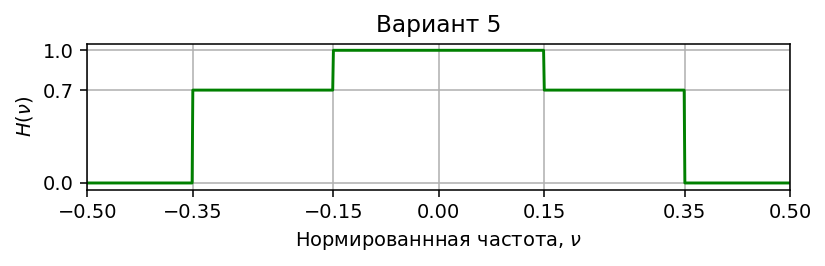

In [8]:
task_3_2("Агеев")


Пример вывода задания.

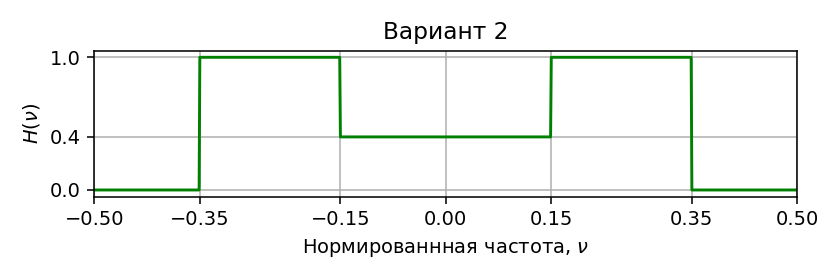

In [4]:
task_3_2(familyname="Фамилия")

# Модуль 4. Графическое моделирование динамических систем.

## Задача 4.1. Моделирование цифрового фильтра в Engee/РДС.

Для выполнения данного задания нужно самостоятельно выбрать цифровой фильтр. Затем в графическом режиме построить его цифровую модель в системе Engee либо РДС и промоделировать работу фильтра на примере одного из возможных выходных сигналов. Обосновать результаты. 